In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "data"))
sys.path.insert(0, os.path.join(os.getcwd(), "..", "src", "utils"))
from DataLoader import DataLoader
from FileParser import FileParser

## Author IDs vs. Author Names

In [3]:
d_train = DataLoader()
d_train.training_data_with_abstracts_citations()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts_citations()

d_test = DataLoader()
d_test.test_data_with_abstracts_citations()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_confproc_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memo

In [4]:
len(d_train.data), len(d_validation.data), len(d_test.data)

(137376, 7511, 11600)

In [5]:
parser = FileParser()
chapters_authors = pd.DataFrame(
    list(parser.get_data("chapters_authors").items()), columns=["chapter", "author"])
chapters_author_names = pd.DataFrame(
    list(parser.get_data("chapters_authors_name").items()), columns=["chapter", "authors_name"])
len(chapters_authors), len(chapters_author_names)

Process 'chapters_authors' not in memory yet.
Process 'chapters_authors_name' not in memory yet.


(351925, 351925)

In [6]:
df_train = pd.merge(d_train.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_train = pd.merge(df_train, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(d_validation.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_validation = pd.merge(df_validation, chapters_author_names, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(d_test.data, chapters_authors, how="inner", on=["chapter", "chapter"])
df_test = pd.merge(df_test, chapters_author_names, how="inner", on=["chapter", "chapter"])

len(df_train), len(df_validation), len(df_test)

(137373, 7511, 11600)

In [7]:
df_train["len_authors"] = df_train.author.apply(lambda x: len(x))
df_train["len_author_names"] = df_train.authors_name.apply(lambda x: len(x))
df_validation["len_authors"] = df_validation.author.apply(lambda x: len(x))
df_validation["len_author_names"] = df_validation.authors_name.apply(lambda x: len(x))
df_test["len_authors"] = df_test.author.apply(lambda x: len(x))
df_test["len_author_names"] = df_test.authors_name.apply(lambda x: len(x))

### Statistics training data

In [8]:
print("Median number of authors per chapter: {}.".format(df_train["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_train["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_train["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_train["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 2.7943627932708757.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 25.


In [9]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(len(df_train[df_train.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 3973.


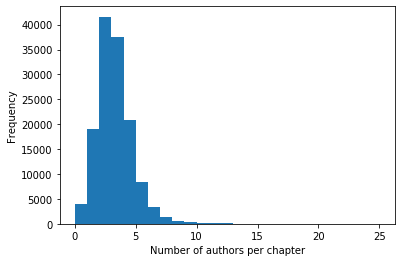

In [10]:
df_train[["len_authors"]].plot(kind="hist",bins=25)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [11]:
df_train[df_train.len_authors==25]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
97514,sg:pub.10.1007/978-3-540-40020-2_1,Architecture-based approaches have been promot...,"[sg:pub.10.1007/3-540-45441-1_30, sg:pub.10.10...",AGILE: Software Architecture for Mobility,<http://scigraph.springernature.com/things/con...,Workshop on the Specification of Abstract Data...,"[sg:person.010056575455.39, sg:person.01454272...","[Andrade L., Baldan P., Baumeister H., Bruni R...",25,25


In [12]:
df_train[df_train.len_authors==25][["len_authors", "len_author_names"]]

,len_authors,len_author_names
97514,25,25


In [13]:
print("Median number of author names per chapter: {}.".format(df_train["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_train["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_train["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_train["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.0131612471155176.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 29.


In [14]:
print("Number of chapters with no author names: {}.".format(
    len(df_train[df_train.len_author_names==0])))

Number of chapters with no author names: 0.


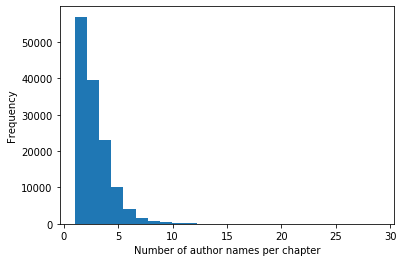

In [15]:
df_train[["len_author_names"]].plot(kind="hist",bins=25)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [16]:
df_train[df_train["len_author_names"]==29]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
123708,sg:pub.10.1007/978-3-642-20898-0_22,"Over the years, the Internet has become a cent...","[sg:pub.10.1007/978-3-642-02080-3_15, sg:pub.1...",Bringing Optical Networks to the Cloud: An Arc...,<http://scigraph.springernature.com/things/con...,The Future Internet Assembly,"[sg:person.013534627010.08, sg:person.01400077...","[Vicat-Blanc Pascale, Figuerola Sergi, Chen Xi...",19,29


### Statistics validation data

In [17]:
print("Median number of authors per chapter: {}.".format(df_validation["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_validation["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_validation["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_validation["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 3.0641725469311676.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 36.


In [18]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_validation[df_validation.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 171.


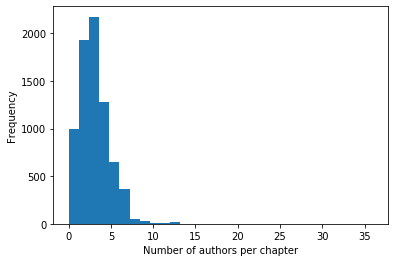

In [19]:
df_validation[["len_authors"]].plot(kind="hist",bins=30)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [20]:
df_validation[df_validation.len_authors==36]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
5586,sg:pub.10.1007/978-3-319-16181-5_14,"The Visual Object Tracking challenge 2014, VOT...","[sg:pub.10.1007/11744023_32, sg:pub.10.1007/97...",The Visual Object Tracking VOT2014 Challenge R...,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012333263...","[Kristan Matej, Pflugfelder Roman, Leonardis A...",36,57


In [21]:
df_validation[df_validation.len_authors==36][["len_authors", "len_author_names"]]

,len_authors,len_author_names
5586,36,57


In [22]:
print("Median number of author names per chapter: {}.".format(df_validation["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_validation["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_validation["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_validation["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.3180668353082146.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 57.


In [23]:
print("Number of chapters with no author names: {}.".format(
    len(df_validation[df_validation.len_author_names==0])))

Number of chapters with no author names: 0.


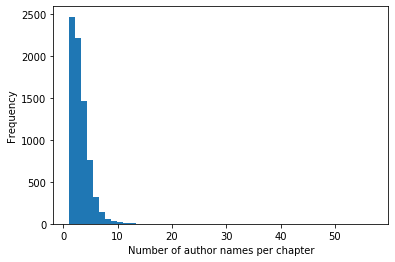

In [24]:
df_validation[["len_author_names"]].plot(kind="hist",bins=50)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [25]:
df_validation[df_validation.len_author_names==57]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
5586,sg:pub.10.1007/978-3-319-16181-5_14,"The Visual Object Tracking challenge 2014, VOT...","[sg:pub.10.1007/11744023_32, sg:pub.10.1007/97...",The Visual Object Tracking VOT2014 Challenge R...,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012333263...","[Kristan Matej, Pflugfelder Roman, Leonardis A...",36,57


### Statistics test data

In [26]:
print("Median number of authors per chapter: {}.".format(df_test["len_authors"].median()))
print("Mean number of authors per chapter: {}.".format(df_test["len_authors"].mean()))
print("Minimum number of authors per chapter: {}.".format(df_test["len_authors"].min()))
print("Maximum number of authors per chapter: {}.".format(df_test["len_authors"].max()))

Median number of authors per chapter: 3.0.
Mean number of authors per chapter: 3.100344827586207.
Minimum number of authors per chapter: 0.
Maximum number of authors per chapter: 93.


In [27]:
print("Number of chapters with no disambiguated authors (no unique ID): {}.".format(
    len(df_test[df_test.len_authors==0])))

Number of chapters with no disambiguated authors (no unique ID): 344.


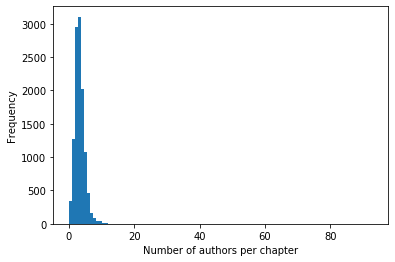

In [28]:
df_test[["len_authors"]].plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of authors per chapter")
plt.show()

In [29]:
df_test[df_test.len_authors==93]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
4562,sg:pub.10.1007/978-3-319-48881-3_54,The Visual Object Tracking challenge VOT2016 a...,"[sg:pub.10.1007/978-3-642-37484-5_29, sg:pub.1...",The Visual Object Tracking VOT2016 Challenge R...,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012526151...","[Kristan Matej, Leonardis Aleš, Matas Jiři, Fe...",93,139


In [30]:
df_test[df_test.len_authors==93][["len_authors", "len_author_names"]]

,len_authors,len_author_names
4562,93,139


In [31]:
print("Median number of author names per chapter: {}.".format(df_test["len_author_names"].median()))
print("Mean number of author names per chapter: {}.".format(df_test["len_author_names"].mean()))
print("Minimum number of author names per chapter: {}.".format(df_test["len_author_names"].min()))
print("Maximum number of author names per chapter: {}.".format(df_test["len_author_names"].max()))

Median number of author names per chapter: 3.0.
Mean number of author names per chapter: 3.4377586206896553.
Minimum number of author names per chapter: 1.
Maximum number of author names per chapter: 139.


In [32]:
print("Number of chapters with no author names: {}.".format(
    len(df_test[df_test.len_author_names==0])))

Number of chapters with no author names: 0.


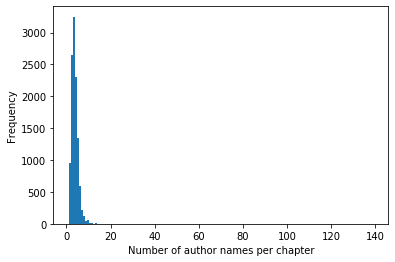

In [33]:
df_test[["len_author_names"]].plot(kind="hist",bins=150)
plt.legend().remove()
plt.xlabel("Number of author names per chapter")
plt.show()

In [34]:
df_test[df_test.len_author_names==139]

,chapter,chapter_abstract,chapter_citations,chapter_title,conferenceseries,conferenceseries_name,author,authors_name,len_authors,len_author_names
4562,sg:pub.10.1007/978-3-319-48881-3_54,The Visual Object Tracking challenge VOT2016 a...,"[sg:pub.10.1007/978-3-642-37484-5_29, sg:pub.1...",The Visual Object Tracking VOT2016 Challenge R...,<http://scigraph.springernature.com/things/con...,European Conference on Computer Vision,"[sg:person.01103043251.16, sg:person.012526151...","[Kristan Matej, Leonardis Aleš, Matas Jiři, Fe...",93,139


## Author IDs

In [35]:
d_train = DataLoader()
d_train.training_data_with_abstracts_citations()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts_citations()

d_test = DataLoader()
d_test.test_data_with_abstracts_citations()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_confproc_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memo

In [36]:
authors_train = d_train.author_ids()
authors_validation = d_validation.author_ids()
authors_test = d_test.author_ids()

Process 'author_id_chapters' not in memory yet.
Process 'author_id_chapters' not in memory yet.
Process 'author_id_chapters' not in memory yet.


In [37]:
len(authors_train.data.chapter.unique()), len(authors_validation.data.chapter.unique()), len(authors_test.data.chapter.unique())

(137376, 7511, 11600)

In [38]:
unique_authors_train = authors_train.data.author.unique()
unique_authors_validation = authors_validation.data.author.unique()
unique_authors_test = authors_test.data.author.unique()

intersect_train_validation = set(unique_authors_train).intersection(set(unique_authors_validation))
intersect_train_test = set(unique_authors_train).intersection(set(unique_authors_test))
intersect_validation_test = set(unique_authors_validation).intersection(set(unique_authors_test))

count_train = len(unique_authors_train)
count_validation = len(unique_authors_validation)
count_test = len(unique_authors_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Author IDs in training set: {}".format(count_train))
print("Author IDs in validation set: {}".format(count_validation))
print("Author IDs in test set: {}".format(count_test))

print("Author IDs in intersection train-validation: {}, Proportion new: {}".format(
count_intersect_train_validation, round(1-count_intersect_train_validation/count_validation, 2)))
print("Author IDs in intersection train-test: {}, Proportion new: {}".format(
count_intersect_train_test, round(1-count_intersect_train_test/count_test, 2)))
print("Author IDs in intersection validation-test: {}, Proportion new: {}".format(
count_intersect_validation_test, round(1-count_intersect_validation_test/count_test, 2)))

Author IDs in training set: 138083
Author IDs in validation set: 18147
Author IDs in test set: 26647
Author IDs in intersection train-validation: 10990, Proportion new: 0.39
Author IDs in intersection train-test: 13502, Proportion new: 0.49
Author IDs in intersection validation-test: 5484, Proportion new: 0.79


## Author Names

In [39]:
d_train = DataLoader()
d_train.training_data_with_abstracts_citations()

d_validation = DataLoader()
d_validation.validation_data_with_abstracts_citations()

d_test = DataLoader()
d_test.test_data_with_abstracts_citations()

Process 'chapters_year' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences_acronym' not in memory yet.
Process 'conferences_city' not in memory yet.
Process 'conferences_country' not in memory yet.
Process 'conferences_datestart' not in memory yet.
Process 'conferences_dateend' not in memory yet.
Process 'conferences_name' not in memory yet.
Process 'conferences_year' not in memory yet.
Process 'conferences_conferenceseries' not in memory yet.
Process 'conferenceseries_name' not in memory yet.
Process 'chapters_abstract' not in memory yet.
Process 'chapters_confproc_scigraph_citations' not in memory yet.
Process 'chapters_books' not in memory yet.
Process 'chapters_title' not in memory yet.
Process 'chapters_language' not in memory yet.
Process 'chapters_year' not in memory yet.
Process 'books_conferences' not in memo

In [40]:
authors_train = d_train.author_names()
authors_validation = d_validation.author_names()
authors_test = d_test.author_names()

Process 'author_name_chapters' not in memory yet.
Process 'author_name_chapters' not in memory yet.
Process 'author_name_chapters' not in memory yet.


In [41]:
len(authors_train.data.chapter.unique()), len(authors_validation.data.chapter.unique()), len(authors_test.data.chapter.unique())

(137376, 7511, 11600)

In [42]:
unique_authors_train = authors_train.data.author_name.unique()
unique_authors_validation = authors_validation.data.author_name.unique()
unique_authors_test = authors_test.data.author_name.unique()

intersect_train_validation = set(unique_authors_train).intersection(set(unique_authors_validation))
intersect_train_test = set(unique_authors_train).intersection(set(unique_authors_test))
intersect_validation_test = set(unique_authors_validation).intersection(set(unique_authors_test))

count_train = len(unique_authors_train)
count_validation = len(unique_authors_validation)
count_test = len(unique_authors_test)

count_intersect_train_validation = len(intersect_train_validation)
count_intersect_train_test = len(intersect_train_test)
count_intersect_validation_test = len(intersect_validation_test)

print("Author IDs in training set: {}".format(count_train))
print("Author IDs in validation set: {}".format(count_validation))
print("Author IDs in test set: {}".format(count_test))

print("Author IDs in intersection train-validation: {}, Proportion new: {}".format(
count_intersect_train_validation, round(1-count_intersect_train_validation/count_validation, 2)))
print("Author IDs in intersection train-test: {}, Proportion new: {}".format(
count_intersect_train_test, round(1-count_intersect_train_test/count_test, 2)))
print("Author IDs in intersection validation-test: {}, Proportion new: {}".format(
count_intersect_validation_test, round(1-count_intersect_validation_test/count_test, 2)))

Author IDs in training set: 164103
Author IDs in validation set: 19994
Author IDs in test set: 30175
Author IDs in intersection train-validation: 11459, Proportion new: 0.43
Author IDs in intersection train-test: 14639, Proportion new: 0.51
Author IDs in intersection validation-test: 5646, Proportion new: 0.81
